# CICIDS2017 dataset
------------------------------------------------

<div>
    <b>Aim</b>: This notebook provide you with a way to create a clean CICIDS2017 dataset using all the .csv files.</div>

<br>

<div>
    <b>Dataset description</b>: The CICIDS2017 dataset, which has been created by the <a href="https://www.unb.ca/cic/datasets/ids-2017.html">Canadian Institute for Cyber-security (CIC)</a>, consists of labeled network flows. The CICIDS2017 contains benign and the most up-to-date common attacks. It is made up of 2,830,743 records with a total of 78 features.
</div>

In [1]:
import pandas as pd
import numpy as np
import glob
import os

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style="white", color_codes=True)
pd.set_option('display.max_columns', None, 'max_colwidth', None, 'display.expand_frame_repr', False)

## Data Cleaning
------------------------------------------------

In [3]:
DATA_DIR  = os.path.join(os.path.abspath(".."), "data")
IMAGE_DIR = os.path.join(os.path.abspath(".."), "images")

### Get data

In [4]:
def clean_column_name(column):
    column = column.strip(' ')
    column = column.replace('/', '_')
    column = column.replace(' ', '_')
    column = column.lower()
    return column

In [5]:
# Read all the .csv files
filenames = glob.glob(os.path.join(DATA_DIR, 'raw', '*.csv'))
datasets = [pd.read_csv(filename) for filename in filenames]

# Remove white spaces and rename the columns
for dataset in datasets:
    dataset.columns = [clean_column_name(column) for column in dataset.columns]

# Concatenate the datasets
dataset = pd.concat(datasets, axis=0, ignore_index=True)
dataset.drop(labels=['fwd_header_length.1'], axis= 1, inplace=True)

Have an initial inspection of the data

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542141 entries, 0 to 2542140
Data columns (total 78 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   destination_port             int64  
 1   flow_duration                int64  
 2   total_fwd_packets            int64  
 3   total_backward_packets       int64  
 4   total_length_of_fwd_packets  int64  
 5   total_length_of_bwd_packets  int64  
 6   fwd_packet_length_max        int64  
 7   fwd_packet_length_min        int64  
 8   fwd_packet_length_mean       float64
 9   fwd_packet_length_std        float64
 10  bwd_packet_length_max        int64  
 11  bwd_packet_length_min        int64  
 12  bwd_packet_length_mean       float64
 13  bwd_packet_length_std        float64
 14  flow_bytes_s                 float64
 15  flow_packets_s               float64
 16  flow_iat_mean                float64
 17  flow_iat_std                 float64
 18  flow_iat_max                 int64  
 19  

In [7]:
dataset.head(5)

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes_s,flow_packets_s,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,fwd_header_length,bwd_header_length,fwd_packets_s,bwd_packets_s,min_packet_length,max_packet_length,packet_length_mean,packet_length_std,packet_length_variance,fin_flag_count,syn_flag_count,rst_flag_count,psh_flag_count,ack_flag_count,urg_flag_count,cwe_flag_count,ece_flag_count,down_up_ratio,average_packet_size,avg_fwd_segment_size,avg_bwd_segment_size,fwd_avg_bytes_bulk,fwd_avg_packets_bulk,fwd_avg_bulk_rate,bwd_avg_bytes_bulk,bwd_avg_packets_bulk,bwd_avg_bulk_rate,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,init_win_bytes_forward,init_win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,49188,4,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,3000000.0,5.000000e+05,4.0,0.0,4,4,4,4.0,0.0,4,4,0,0.0,0.0,0,0,0,0,0,0,40,0,5.000000e+05,0.0,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,12000000.0,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.0,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,12000000.0,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.0,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,12000000.0,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.0,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4000000.0,6.666667e+05,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,6.666667e+05,0.0,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,0,0,0,0,0,0,2,12,0,0,245,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [8]:
dataset.describe(include=[int, float])

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes_s,flow_packets_s,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,fwd_header_length,bwd_header_length,fwd_packets_s,bwd_packets_s,min_packet_length,max_packet_length,packet_length_mean,packet_length_std,packet_length_variance,fin_flag_count,syn_flag_count,rst_flag_count,psh_flag_count,ack_flag_count,urg_flag_count,cwe_flag_count,ece_flag_count,down_up_ratio,average_packet_size,avg_fwd_segment_size,avg_bwd_segment_size,fwd_avg_bytes_bulk,fwd_avg_packets_bulk,fwd_avg_bulk_rate,bwd_avg_bytes_bulk,bwd_avg_packets_bulk,bwd_avg_bulk_rate,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,init_win_bytes_forward,init_win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
count,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.540801e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2542141.0,2542141.0,2542141.0,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2542141.0,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2542141.0,2542141.0,2542141.0,2542141.0,2542141.0,2542141.0,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06,2.542141e+06
mean,8.057795e+03,1.544539e+07,9.716660e+00,1.086743e+01,5.473822e+02,1.729797e+04,2.151780e+02,1.888957e+01,6.007840e+01,7.210913e+01,9.327081e+02,4.112069e+01,3.255762e+02,3.618935e+02,inf,inf,1.377428e+06,3.128986e+06,9.879012e+06,1.723543e+05,1.513657e+07,2.763092e+06,3.541409e+06,9.735627e+06,1.057119e+06,1.008345e+07,1.869341e+06,1.579520e+06,4.924546e+06,9.908030e+05,4.760830e-02,0.0,0.0,0.0,-2.896725e+04,-2.549577e+03,6.053314e+04,6.743668e+03,1.641105e+01,1.017113e+03,1.817529e+02,3.162530e+02,5.340726e+05,3.743734e-02,4.760830e-02,2.391685e-04,2.857493e-01,3.256904e-01,9.588965e-02,0.0,2.403486e-04,6.878352e-01,2.027741e+02,6.007840e+01,3.255762e+02,0.0,0.0,0.0,0.0,0.0,0.0,9.716660e+00,5.473822e+02,1.086743e+01,1.729761e+04,7.148799e+03,2.034795e+03,5.643280e+00,-3.055860e+03,8.384228e+04,4.108791e+04,1.555291e+05,6.058808e+04,8.963907e+06,5.473023e+05,9.376316e+06,8.537139e+06
std,1.836861e+04,3.421694e+07,7.906831e+02,1.051811e+03,5.843776e+03,2.387238e+06,7.420455e+02,6.275191e+01,1.921477e+02,2.928974e+02,2.028721e+03,6.943086e+01,6.291510e+02,8.779464e+02,NaN,NaN,4.624813e+06,8.319251e+06,2.543532e+07,3.039023e+06,3.414604e+07,9.721190e+06,1.007803e+07,2.551218e+07,8.732086e+06,2.895495e+07,9.020598e+06,6.545111e+06,1.772598e+07,8.411019e+06,2.129361e-01,0.0,0.0,0.0,2.221577e+07,1.532425e+06,2.422692e+05,3.778063e+04,2.550328e+01,2.111786e+03,3.155076e+02,6.588527e+02,1.730580e+06,1.898310e-01,2.129361e-01,1.546323e-02,4.517706e-01,4.686323e-01,2.944399e-01,0.0,1.550132e-02,6.796655e-01,3.431654e+02,1.921477e+02,6.291510e+02,0.0,0.0,0.0,0.0,0.0,0.0,7.906831e+02,5.843776e+03,1.051811e+03,2.387206e+06,1.447264e+04,8.520327e+03,6.713710e+02,1.144922e+06,6.616263e+05,3.951051e+05,1.036473e+06,5.905

In [9]:
dataset.describe(include=[object]).transpose()

,count,unique,top,freq
label,2542141,14,BENIGN,1984531


In [10]:
dataset.label.value_counts()

BENIGN                        1984531
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Web Attack � Sql Injection         21
Heartbleed                         11
Name: label, dtype: int64

### Dealing with duplicates

We first check if there are duplicates after combining the eight .csv file.

In [11]:
dataset.duplicated().any()

True

As we can see from above, there are duplicates and we need get rid of them. 

In [12]:
print('Data size BEFORE deleteting instances with duplicate values: ', dataset.shape[0], end='\n\n')

# Remove duplicate rows
dataset.drop_duplicates(inplace=True, keep=False, ignore_index=True)

print('Data size AFTER deleteting instances containing duplicate values: ', dataset.shape[0])

Data size BEFORE deleteting instances with duplicate values:  2542141

Data size AFTER deleteting instances containing duplicate values:  2199282


### Dealing with missing values

Then, we check if there are missing values in each feature.

In [13]:
dataset.isnull().sum().sum()

320

As we can see from above, there are 320 missing values in this **CIC-IDS-2017** dataset.

We have a few options to deal with missing values:
1. Get rid of the corresponding instances.
2. Get rid of the whole attribute.
3. Set the values to some value (zero, the mean, the median, etc.).
4. Use imputation methods.

In [14]:
dataset.isnull().sum() / dataset.shape[0]

destination_port               0.0
flow_duration                  0.0
total_fwd_packets              0.0
total_backward_packets         0.0
total_length_of_fwd_packets    0.0
                              ... 
idle_mean                      0.0
idle_std                       0.0
idle_max                       0.0
idle_min                       0.0
label                          0.0
Length: 78, dtype: float64

The number of instances in the dataset is large enough and the fraction of intances with missing values is small, an easy way is simply to remove those instances containing missing values. However, we need to first ensure that the missing values are not related to a specific label.

In [15]:
dataset.columns[dataset.isnull().any()]

Index(['flow_bytes_s'], dtype='object')

All the missing values come from the `flow_bytes_s`.

In [16]:
print('Data size BEFORE deleteting instances with missing values: ', dataset.shape[0], end='\n\n')

# Remove missing values
dataset.dropna(axis=0, inplace=True, how="any")

print('Data size AFTER deleteting instances containing missing values: ', dataset.shape[0])

Data size BEFORE deleteting instances with missing values:  2199282

Data size AFTER deleteting instances containing missing values:  2198962


### Dealing with infinite values

Checking if all values are finite.

In [17]:
np.all(np.isfinite(dataset.drop(['label'], axis=1)))

False

In [18]:
# Replace infinite values to NaN
dataset.replace([-np.inf, np.inf], np.nan, inplace=True)

# Check which labels are related to infinte values
dataset[(dataset['flow_bytes_s'].isnull()) & (dataset['flow_packets_s'].isnull())].label.unique()

array(['BENIGN', 'Bot', 'PortScan', 'DDoS', 'FTP-Patator'], dtype=object)

In [19]:
print('Data size BEFORE deleteting instances with infinite values: ', dataset.shape[0], end='\n\n')

# Remove infinte values
dataset.dropna(axis=0, how='any', inplace=True)

print('Data size AFTER deleteting instances containing infinite values: ', dataset.shape[0])

Data size BEFORE deleteting instances with infinite values:  2198962

Data size AFTER deleteting instances containing infinite values:  2197973


### Dealing with features with quasi null std deviation

Standard deviation denoted by sigma (σ) is the average of the squared root differences from the mean.

In [20]:
dataset.label.value_counts()

BENIGN                        1807787
DoS Hulk                       171509
DDoS                           128005
PortScan                        57305
DoS GoldenEye                   10279
FTP-Patator                      5480
DoS slowloris                    5289
DoS Slowhttptest                 5176
SSH-Patator                      3071
Bot                              1943
Web Attack � Brute Force         1445
Web Attack � XSS                  652
Web Attack � Sql Injection         21
Heartbleed                         11
Name: label, dtype: int64

In [21]:
dataset.dtypes

destination_port                 int64
flow_duration                    int64
total_fwd_packets                int64
total_backward_packets           int64
total_length_of_fwd_packets      int64
                                ...   
idle_mean                      float64
idle_std                       float64
idle_max                         int64
idle_min                         int64
label                           object
Length: 78, dtype: object

In [22]:
dataset_std = dataset.std(numeric_only=True)
dataset_std

destination_port               1.930537e+04
flow_duration                  3.620060e+07
total_fwd_packets              8.503302e+02
total_backward_packets         1.131159e+03
total_length_of_fwd_packets    6.280524e+03
                                   ...     
active_min                     6.345669e+05
idle_mean                      2.616746e+07
idle_std                       5.182619e+06
idle_max                       2.697308e+07
idle_min                       2.590092e+07
Length: 77, dtype: float64

In [23]:
# Find Features that meet the threshold
constant_features = [column for column, std in dataset_std.iteritems() if std < 0.01]

# Drop the constant features
dataset.drop(labels=constant_features, axis=1, inplace=True)

Some features such as `bwd_psh_flags`, `fwd_urg_flags`, `bwd_urg_flags`, `cwe_flag_count`, `fwd_avg_bytes_bulk`, `fwd_avg_packets_bulk`, `fwd_avg_bulk_rate`, `bwd_avg_bytes_bulk`, `bwd_avg_packets_bulk`, `bwd_avg_bulk_rate`  don't vary. Hence, the correlation is NaN by definition.

### Observing the outliers

In [25]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers with interquartile range
filt = (dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))
print(filt.sum())

/var/folders/cg/tzz7k9r96r7cjj5l0x2ghds40000gn/T/ipykernel_15866/2429677622.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  filt = (dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))


ack_flag_count                      0
act_data_pkt_fwd               171204
active_max                     521882
active_mean                    521882
active_min                     521882
                                ...  
total_backward_packets         213375
total_fwd_packets              225993
total_length_of_bwd_packets    388978
total_length_of_fwd_packets    279415
urg_flag_count                 229538
Length: 68, dtype: int64


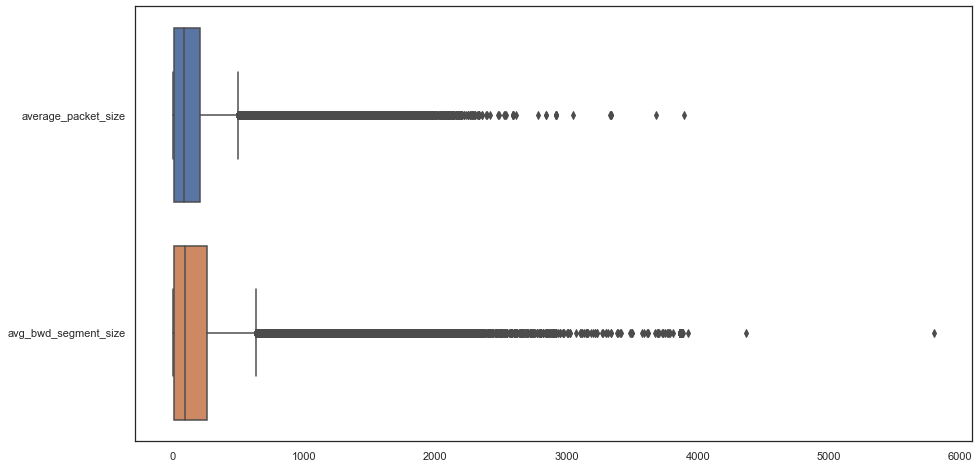

In [26]:
fig = plt.figure(figsize=(15, 8))
sns.boxplot(data=dataset[["average_packet_size", "avg_bwd_segment_size"]], orient="h")

#plt.title('Summary of some variables containing outliers', fontsize=18)
plt.show()
fig.savefig(os.path.join(IMAGE_DIR, 'outliers.pdf'))

Convert the dtype of some features

In [27]:
dataset[['flow_bytes_s', 'flow_packets_s']] = dataset[['flow_bytes_s', 'flow_packets_s']].apply(pd.to_numeric)

Create a new feature `Port Category`

In [28]:
conds = [
    (dataset['destination_port'] >= 1) & (dataset['destination_port'] < 1024),
    (dataset['destination_port'] >= 1024) & (dataset['destination_port'] < 49152),
    (dataset['destination_port'] >= 49152) & (dataset['destination_port'] <= 65535)
]

choices = [
    "1 - 1023", 
    "1024 - 49151",
    "49152 - 65535"
]

dataset.insert(1, 'destination_port_category', np.select(conds, choices, default="0"))

## Data Exploration
------------------------------------------------

### Correlation Matrix

In [29]:
dataset_corr = dataset.corr()
dataset_corr.head(5)

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes_s,flow_packets_s,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,fwd_header_length,bwd_header_length,fwd_packets_s,bwd_packets_s,min_packet_length,max_packet_length,packet_length_mean,packet_length_std,packet_length_variance,fin_flag_count,syn_flag_count,rst_flag_count,psh_flag_count,ack_flag_count,urg_flag_count,ece_flag_count,down_up_ratio,average_packet_size,avg_fwd_segment_size,avg_bwd_segment_size,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,init_win_bytes_forward,init_win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
destination_port,1.000000,-0.178929,-0.004728,-0.004409,0.015448,-0.003504,0.100563,-0.038846,0.146713,0.132449,-0.223519,-0.260265,-0.249693,-0.201206,0.071597,0.372279,-0.119569,-0.138968,-0.137644,-0.024142,-0.178244,-0.112430,-0.117272,-0.136420,-0.057334,-0.120677,-0.077683,-0.041330,-0.061300,-0.056777,0.244761,0.000494,0.000823,0.360479,0.153120,-0.252499,-0.150935,-0.181643,-0.147004,-0.083742,-0.049363,0.244761,-0.007201,-0.231993,0.590513,0.539066,-0.007101,0.042657,-0.182612,0.146713,-0.249693,-0.004728,0.015448,-0.004409,-0.003504,-0.139748,0.219220,-0.003609,0.001082,-0.040656,-0.048855,-0.058681,-0.027109,-0.134916,0.007467,-0.130338,-0.136592
flow_duration,-0.178929,1.000000,0.020189,0.019118,0.104194,0.016046,0.253447,-0.116621,0.131556,0.217638,0.483401,-0.247358,0.449163,0.432011,-0.025868,-0.110477,0.540693,0.744206,0.788529,0.058417,0.998554,0.548826,0.730266,0.788317,0.205939,0.806100,0.405120,0.513509,0.575155,0.208926,-0.023513,-0.000053,-0.001044,-0.101200,-0.076046,-0.254923,0.499552,0.416081,0.442653,0.270809,0.228878,-0.023513,0.007442,0.180175,0.038399,-0.124408,0.007383,-0.167473,0.393291,0.131556,0.449163,0.020189,0.104194,0.019118,0.016045,0.077630,-0.044277,0.015514,-0.001187,0.181951,0.233609,0.283727,0.116263,0.772315,0.242671,0.784477,0.741633
total_fwd_packets,-0.004728,0.020189,1.000000,0.999133,0.644737,0.997071,0.008591,-0.003187,-0.000613,0.000734,0.021826,-0.006028,0.020336,0.005455,0.000436,-0.002268,-0.001631,-0.001336,0.001290,-0.000612,0.019855,-0.001609,-0.000739,0.000853,-0.001345,0.023743,-0.001059,0.000130,0.002579,-0.001199,0.001908,0.000477,0.013739,-0.002098,-0.001462,-0.006755,0.021001,0.023475,0.010923,0.004697,-0.001444,0.001908,0.000358,0.007115,0.001501,-0.003866,0.000356,0.001129,0.021107,-0.000613,0.020336,1.000000,0.644737,0.999133,0.997065,0.003331,-0.000942,0.887504,-0.000179,0.040069,0.007492,0.030227,0.041674,0.000852,0.000468,0.000917,0.000746
total_backward_packets,-0.004409,0.019118,0.999133,1.000000,0.641471,0.994503,0.008349,-0.002760,-0.000843,0.000429,0.021645,-0.005339,0.020459,0.005171,0.000393,-0.002299,-0.001953,-0.001776,0.000866,-0.000635,0.018768,-0.001768,-0.001227,0.000417,-0.001214,0.023267,-0.001191,-0.000032,0.002689,-0.001151,0.001754,0.000758,0.013752,-0.002178,-0.001211,-0.006131,0.020783,0.023930,0.010823,0.004689,-0.001287,0.001754,0.000219,0.006508,0.001368,-0.003233,0.000218,0.003411,0.021570,-0.000843,0.020459,0.999133,0.641471,1.000000,0.994498,0.002773,-0.000902,0.882869,0.000023,0.039308,0.005796,0.028642,0.041800,0.000499,0.000172,0.000510,0.000444
total_length_of_fwd_packets,0.015448,0.104194,0.644737,0.641471,1.000000,0.638430,0.331792,-0.007653,0.299552,0.271065,0.032805,-0.047309,0.025656,0.010334,0.003097,-0.019745,0.004358,0.021493,0.040979,-0.005407,0.102786,0.007314,0.036329,0.041232,-0.010951,0.126861,0.011549,0.060975,0.068591,-0.009

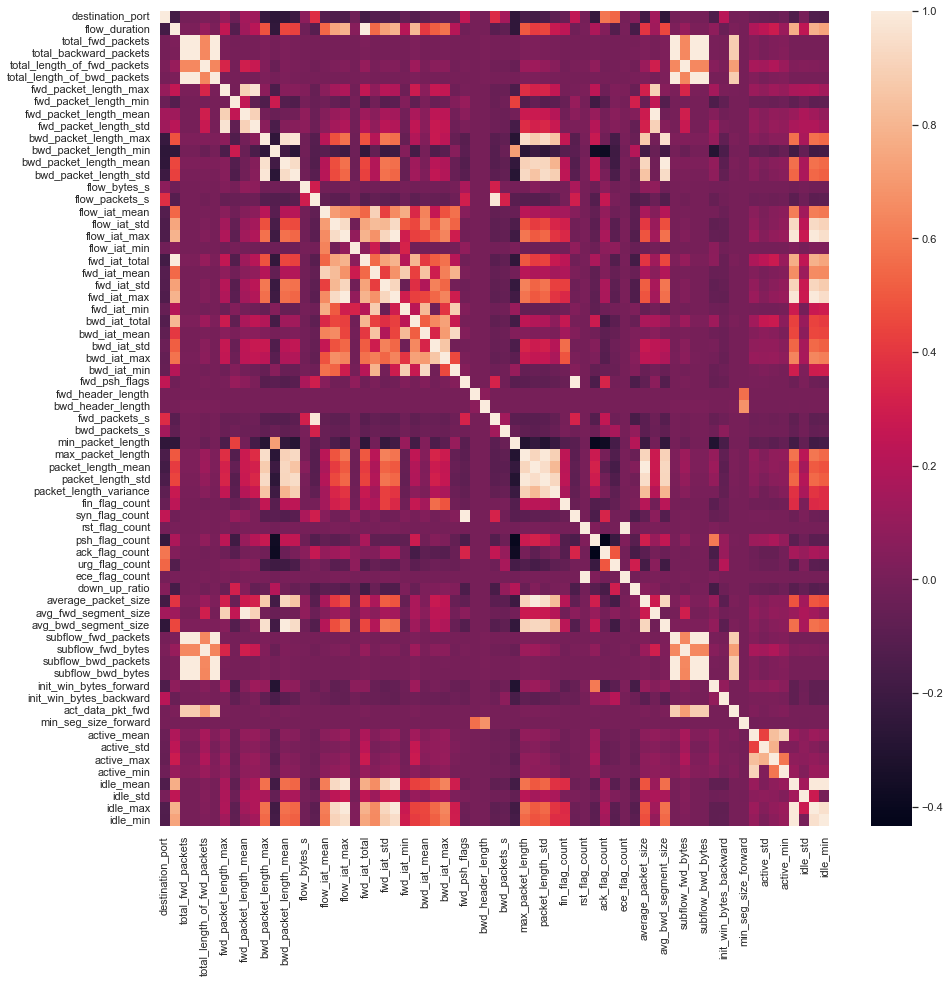

In [30]:
fig = plt.figure(figsize=(15, 15))
sns.set(font_scale=1.0)
ax = sns.heatmap(dataset_corr, annot=False)
fig.savefig(os.path.join(IMAGE_DIR, 'correlation matrix.pdf'))

We can see that some features seems to be highly correlated. Hence, we might need to remove them since there are bringing redundant information

In [31]:
# Create & Apply mask
mask = np.triu(np.ones_like(dataset_corr, dtype=bool))
tri_df = dataset_corr.mask(mask)

# Find Features that meet the threshold
correlated_features = [c for c in tri_df.columns if any(tri_df[c] > 0.98)]

# Drop the highly correlated features
dataset.drop(labels=correlated_features, axis=1, inplace=True)

### Label 

/Users/othmanebelarbi/Documents/DBN-FL/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


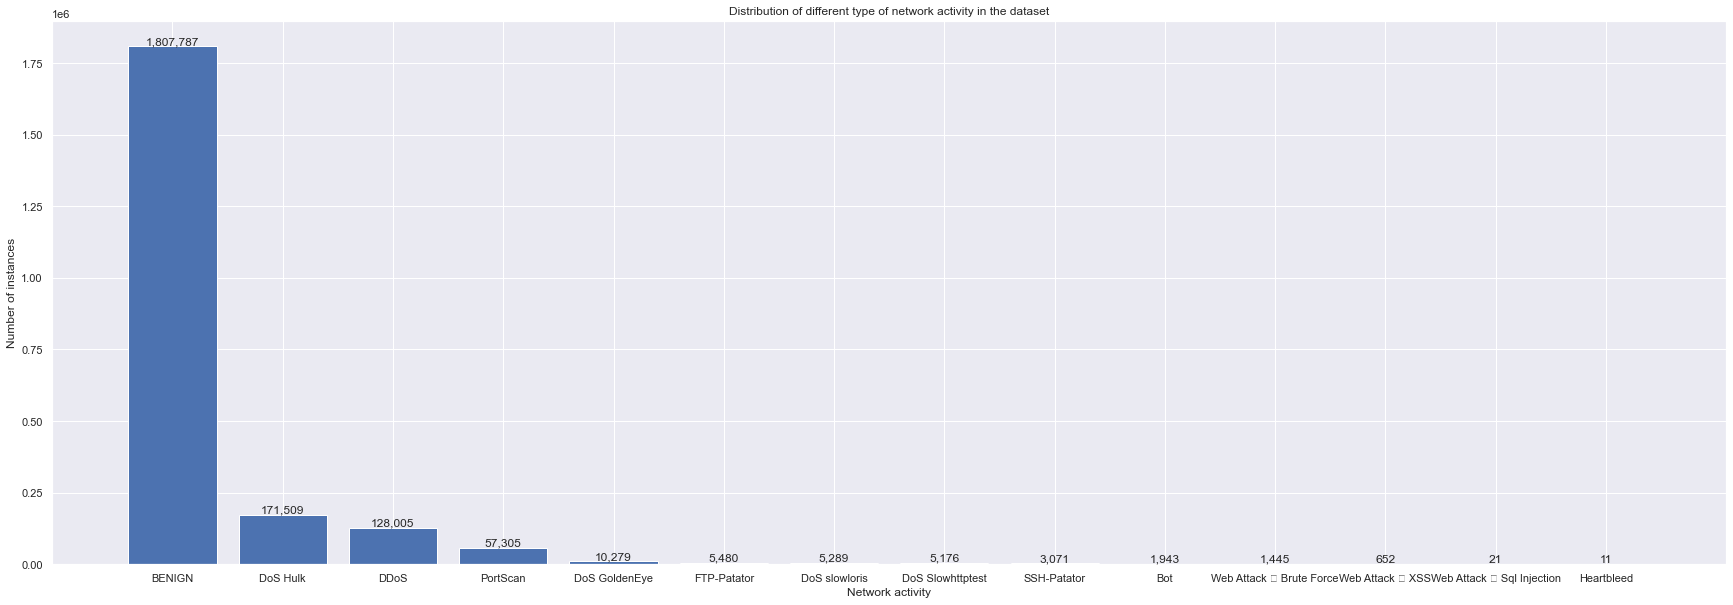

/var/folders/cg/tzz7k9r96r7cjj5l0x2ghds40000gn/T/ipykernel_15866/1958567298.py:19: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.savefig(os.path.join(IMAGE_DIR, 'network_activity.pdf'))


In [32]:
fig = plt.figure(figsize=(30, 10))

attack = dataset['label'].value_counts()

attack_count = attack.values
attack_type = attack.index

bar = plt.bar(attack_type, attack_count, align='center')

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, format(height, ','), ha='center', va='bottom')

plt.title('Distribution of different type of network activity in the dataset')
plt.xlabel('Network activity')
plt.ylabel('Number of instances')
plt.grid(True)
plt.show()
fig.savefig(os.path.join(IMAGE_DIR, 'network_activity.pdf'))

The dataset is clearly imbalaced and we need to deal with it. We can merge few minority classes having similar characteristics and behavior to form new attack classes.

In [33]:
dataset['label'] = dataset['label'].str.replace('Web Attack �', 'Web Attack', regex=False)

# Proposed Groupings
attack_group = {
    'BENIGN': 'Benign',
    'PortScan': 'PortScan',
    'DDoS': 'DoS/DDoS',
    'DoS Hulk': 'DoS/DDoS',
    'DoS GoldenEye': 'DoS/DDoS',
    'DoS slowloris': 'DoS/DDoS', 
    'DoS Slowhttptest': 'DoS/DDoS',
    'Heartbleed': 'DoS/DDoS',
    'FTP-Patator': 'Brute Force',
    'SSH-Patator': 'Brute Force',
    'Bot': 'Botnet ARES',
    'Web Attack Brute Force': 'Web Attack',
    'Web Attack Sql Injection': 'Web Attack',
    'Web Attack XSS': 'Web Attack',
    'Infiltration': 'Infiltration'
}

# Create grouped label column
dataset['label_category'] = dataset['label'].map(lambda x: attack_group[x])
dataset['label_category'].value_counts()

Benign         1807787
DoS/DDoS        320269
PortScan         57305
Brute Force       8551
Web Attack        2118
Botnet ARES       1943
Name: label_category, dtype: int64

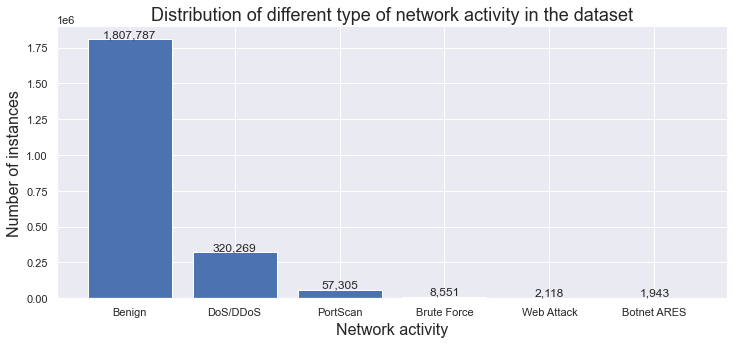

In [34]:
fig = plt.figure(figsize=(12, 5))

attack = dataset['label_category'].value_counts()

attack_count = attack.values
attack_type = attack.index

bar = plt.bar(attack_type, attack_count, align='center')

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, format(height, ','), ha='center', va='bottom', fontsize=12)

plt.title('Distribution of different type of network activity in the dataset', fontsize=18)
plt.xlabel('Network activity', fontsize=16)
plt.ylabel('Number of instances', fontsize=16)
plt.grid(True)
plt.show()
fig.savefig(os.path.join(IMAGE_DIR, 'network_activity_category.pdf'))

### Port Usage Comparaison

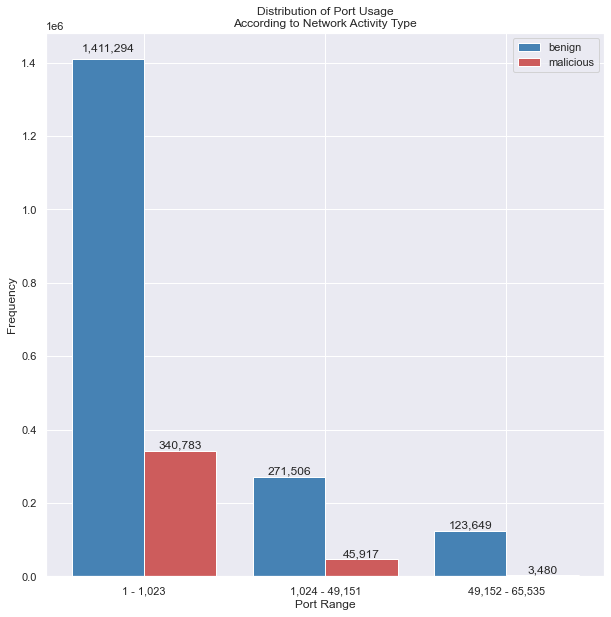

In [35]:
fig, ax = plt.subplots(figsize=(10,10))

benign_ports = dataset.loc[dataset['label'] == 'BENIGN', 'destination_port_category']
malicious_ports = dataset.loc[dataset['label'] != 'BENIGN', 'destination_port_category']

# get rid of rows with specific value
benign_ports = benign_ports[benign_ports != "0"]
malicious_ports = malicious_ports[malicious_ports != "0"]

# sum each port category column
benign_ports = benign_ports.value_counts()
malicious_ports = malicious_ports.value_counts()

indexes = np.arange(3)
width = 0.4
rect1 = plt.bar(indexes, benign_ports.values, width, color="steelblue", label="benign")
rect2 = plt.bar(indexes + width, malicious_ports.values, width, color="indianred", label="malicious")

def add_text(rect):
    # add text to top of each bar
    for r in rect:
        h = r.get_height()
        plt.text(r.get_x() + r.get_width()/2, h*1.01, s=format(h, ",") ,fontsize=12, ha='center', va='bottom')

add_text(rect1)
add_text(rect2)

ax.set_xticks(indexes + width / 2)
ax.set_xticklabels(["1 - 1,023", "1,024 - 49,151", "49,152 - 65,535"])
plt.title('Distribution of Port Usage\nAccording to Network Activity Type')
plt.xlabel('Port Range')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()
fig.savefig(os.path.join(IMAGE_DIR, 'port_usage_comparison.pdf'))

## Data Preparation
------------------------------------------------

### Data Splitting

First step to data preparation is splitting the data into traning and testing sets. For this there already exists sklearn function that does all the splitting for us. This step is important so we can have representative data for evaluating our model. Both train and test samples should contain similar data variance.

In [36]:
labels = dataset['label_category']
features = dataset.drop(labels=['label', 'label_category', 'destination_port_category'], axis=1)

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42, stratify=labels)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [38]:
X_train.shape, X_test.shape, X_val.shape

((1318783, 49), (439595, 49), (439595, 49))

### Scaling features to a range

In [39]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, QuantileTransformer
from sklearn.compose import ColumnTransformer

In [40]:
categorical_features = features.select_dtypes(exclude=["int64", "float64"]).columns
numeric_features = features.select_dtypes(exclude=[object]).columns

preprocessor = ColumnTransformer(transformers=[
    ('categoricals', OneHotEncoder(drop='first', sparse=False, handle_unknown='error'), categorical_features),
    ('numericals', QuantileTransformer(), numeric_features)
])

Preprocess the features

In [41]:
columns = numeric_features.tolist()

X_train = pd.DataFrame(preprocessor.fit_transform(X_train), columns=columns)
X_test = pd.DataFrame(preprocessor.transform(X_test), columns=columns)
X_val = pd.DataFrame(preprocessor.transform(X_val), columns=columns)

Preprocess the labels

In [42]:
le = LabelEncoder()

y_train = pd.DataFrame(le.fit_transform(y_train), columns=["label"])
y_test = pd.DataFrame(le.transform(y_test), columns=["label"])
y_val = pd.DataFrame(le.transform(y_val), columns=["label"])

Save the results

In [43]:
X_train.to_pickle(os.path.join(DATA_DIR, 'processed', 'train/train_features.pkl'))
X_val.to_pickle(os.path.join(DATA_DIR, 'processed', 'val/val_features.pkl'))
X_test.to_pickle(os.path.join(DATA_DIR, 'processed', 'test/test_features.pkl'))

y_train.to_pickle(os.path.join(DATA_DIR, 'processed', 'train/train_labels.pkl'))
y_val.to_pickle(os.path.join(DATA_DIR, 'processed', 'val/val_labels.pkl'))
y_test.to_pickle(os.path.join(DATA_DIR, 'processed', 'test/test_labels.pkl'))

In [44]:
X_train.shape

(1318783, 49)

## Balance the training set using combination of `SMOTE` & `RandomUnderSampler`
------------------------

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

def balance_dataset(X, y, undersampling_strategy, oversampling_strategy):

    under_sampler = RandomUnderSampler(sampling_strategy=undersampling_strategy, random_state=0)
    X_under, y_under = under_sampler.fit_resample(X, y)

    over_sampler = SMOTE(sampling_strategy=oversampling_strategy)
    X_bal, y_bal = over_sampler.fit_resample(X_under, y_under)
    
    return X_bal, y_bal

***Label Encoder Transformation***
```json
{
    'Benign': 0,
    'DoS/DDoS': 3,
    'PortScan': 4,
    'Brute Force': 2,
    'Web Attack': 5,
    'Botnet ARES': 1
}
```

In [ ]:
undersampling_strategy = {
    0: 800000,
    3: 192161,
    4: 34383,
    2: 5131,
    5: 1271,
    1: 1166,
}

oversampling_strategy = {
    0: 800000,
    3: 212102,
    4: 44460,
    2: 50115,
    5: 50284,
    1: 50149,
}

# Balance the training set
X_train_bal, y_train_bal = balance_dataset(X_train, y_train, undersampling_strategy, oversampling_strategy)

# Save the balanced training set
X_train_bal.to_pickle(os.path.join(DATA_DIR, 'processed', 'train/train_features_balanced.pkl'))
y_train_bal.to_pickle(os.path.join(DATA_DIR, 'processed', 'train/train_labels_balanced.pkl'))

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

# sum each port category column
imbalanced = y_train.value_counts()
balanced = y_train_bal.value_counts()

indexes = np.arange(6)
width = 0.4
rect1 = plt.bar(indexes, imbalanced.values, width, color="steelblue", label="imbalanced")
rect2 = plt.bar(indexes + width, balanced.values, width, color="indianred", label="balanced")

def add_text(rect):
    """Add text to top of each bar."""
    for r in rect:
        h = r.get_height()
        plt.text(r.get_x() + r.get_width()/2, h*1.01, s=format(h, ",") ,fontsize=12, ha='center', va='bottom')

add_text(rect1)
add_text(rect2)

ax.set_xticks(indexes + width / 2)
ax.set_xticklabels(['Benign', 'DoS/DDoS', 'PortScan', 'Brute Force', 'Web Attack', 'Botnet ARES'])
plt.xlabel('Traffic Activity', fontsize=16)
plt.ylabel('# instances', fontsize=16)
plt.legend()
plt.grid()
plt.show()
fig.savefig(os.path.join(IMAGE_DIR, 'balanced_dataset.pdf'))